# read image, display it

In [3]:
import cv2
img = cv2.imread('images/Robin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', img) 
cv2.imshow('Gray image', gray)
cv2.waitKey(0)        
cv2.destroyAllWindows() 



# read, convert to grayscale, save

In [60]:
import cv2
img = cv2.imread('images/Anna.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('images/AnnaGray.jpg', gray)

True

# Image is just a function
## Read grayscale, and plot this function

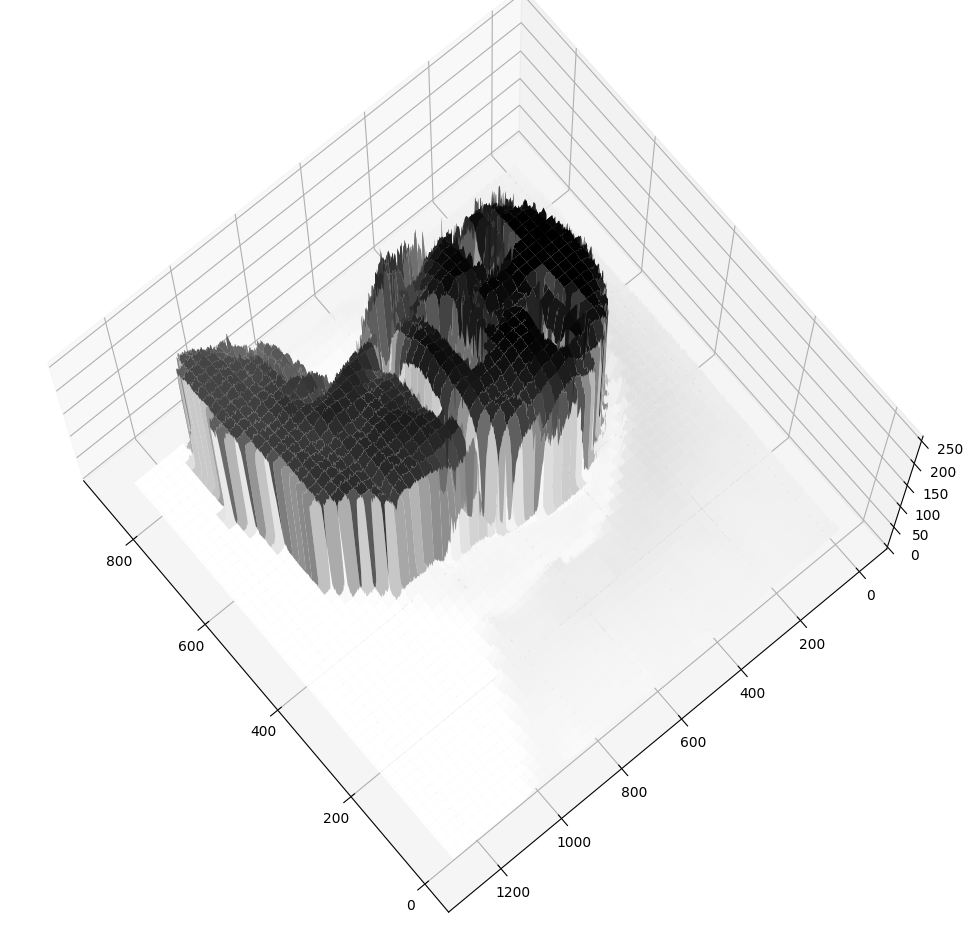

In [67]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

img = cv2.imread('images/AnnaGray.jpg', cv2.IMREAD_GRAYSCALE)
x=np.arange(0, img.shape[1])
y=np.arange(0, img.shape[0])
xx, yy = np.meshgrid(x, y)

# Set up Figure and 3D Axes
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Plot using Axes notation
ax.view_init(75, 140)
ax.plot_surface(xx, yy, img, cmap=cm.Greys)

# Convolution & Correlations
## Animation how correlation works

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interactive, IntSlider, Layout, Button
%matplotlib inline
def g(i):
    plt.figure(figsize = (8,8))
    plt.imshow(mpimg.imread('animations\\correlation\\corr'+f'{i:04d}'+'.png'))
    # plt.axis('off')
    plt.show()

interactive_plot = interactive(g, i=IntSlider(    value=1,    min=1,    max=254,    step=1,   layout=Layout(width='1400px') ))
interactive_plot

interactive(children=(IntSlider(value=1, description='i', layout=Layout(width='1400px'), max=254, min=1), Outp…

## Same as on the animation, but with python

In [201]:
from scipy import signal
import numpy as np

H = np.array([[1,2],[3,0]])
F=np.array([[2,2,3],[0,1,3],[1,2,0]])

print("H \n",H )
print("F \n",F)
correlation= signal.correlate2d(F, H, mode='valid') # in this function we bass image first then filter
print("correlation(H, F)\n",correlation)

H 
 [[1 2]
 [3 0]]
F 
 [[2 2 3]
 [0 1 3]
 [1 2 0]]
correlation(H, F)
 [[ 6 11]
 [ 5 13]]



## Correlate impulse with simple image

In [96]:
from scipy import signal
import numpy as np

impulse = np.zeros([5,5])
impulse[2,2]=1
print("impulse\n", impulse)

img = np.arange(1,10).reshape((3, 3))
print("img\n",img)

correlation= signal.correlate2d(impulse, img)
print("correlation(impulse, img)\n",correlation)

correlation= signal.correlate2d(img, impulse)
print("correlation(img, impulse)\n",correlation)

convolve2d= signal.convolve2d(impulse, img)
print("convolve2d(impulse, img)\n",convolve2d)

impulse
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
img
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
correlation(impulse, img)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 9. 8. 7. 0. 0.]
 [0. 0. 6. 5. 4. 0. 0.]
 [0. 0. 3. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
correlation(img, impulse)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
convolve2d(impulse, img)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


## Convolve impulse and image
See that they are the opposite (corr and conv).

In [98]:
from scipy import signal
import numpy as np

impulse = np.zeros([5,5])
impulse[2,2]=1
print("impulse\n", impulse)

img = np.arange(1,10).reshape((3, 3))
print("img\n",img)

correlation= signal.convolve2d(impulse, img)
print("convolution(impulse, img)\n",correlation)

correlation= signal.convolve2d(img, impulse)
print("convolution(img, impulse)\n",correlation)


impulse
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
img
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
convolution(impulse, img)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
convolution(img, impulse)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [39]:
xx.shape

(1600, 1200)

In [40]:
yy.shape

(1600, 1200)

In [42]:
yy


array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ...,
       [1597, 1597, 1597, ..., 1597, 1597, 1597],
       [1598, 1598, 1598, ..., 1598, 1598, 1598],
       [1599, 1599, 1599, ..., 1599, 1599, 1599]])

In [36]:
img = cv2.imread('images/RobinGray.jpg', cv2.IMREAD_GRAYSCALE)


In [37]:
img.shape

(1200, 1600)

In [35]:
cv2.imshow('image', img) 
cv2.waitKey(0)        
cv2.destroyAllWindows() 

X